<a href="https://colab.research.google.com/github/armandossrecife/my_validation2/blob/main/analise_issues_cassandra_c2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Piloto 1 - Análise dos issues do Cassandra

2a. Rodada (pós críicas)

**Cenário2:** Issues que aparecem nos commits com classes críticas e SATD

Commits analisados: 29230

Issues analisados: 18635

Faixa de análise: from 2/03/2009 to 4/10/2023

Repositório Apache Cassandra: https://github.com/apache/cassandra

Issue Tracker: https://issues.apache.org/jira/projects/CASSANDRA

### Importa o dataset inicial

In [1]:
!wget https://raw.githubusercontent.com/armandossrecife/my_validation2/main/commits_arquivos_criticos.xlsx
!wget https://raw.githubusercontent.com/armandossrecife/my_validation2/main/issues_in_commits_arquivos_criticos.xlsx
!wget https://raw.githubusercontent.com/armandossrecife/my_validation2/main/commits_arquivos_critico_e_issues.txt
!wget https://raw.githubusercontent.com/armandossrecife/my_validation2/main/commits_with_satd_keywords_with_critical_files.xlsx
!wget https://raw.githubusercontent.com/armandossrecife/my_validation2/main/issues_in_commits_with_satd_keywords_with_critical_files.xlsx
!wget https://raw.githubusercontent.com/armandossrecife/my_validation2/main/issues_inspected_c2.xlsx
!wget https://raw.githubusercontent.com/armandossrecife/my_validation2/main/my_inspection_c2.zip

--2023-10-30 12:50:40--  https://raw.githubusercontent.com/armandossrecife/my_validation2/main/commits_arquivos_criticos.xlsx
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13233731 (13M) [application/octet-stream]
Saving to: ‘commits_arquivos_criticos.xlsx’

commits_arquivos_cr 100%[===================>]  12.62M  --.-KB/s    in 0.1s    

2023-10-30 12:50:41 (93.9 MB/s) - ‘commits_arquivos_criticos.xlsx’ saved [13233731/13233731]

--2023-10-30 12:50:41--  https://raw.githubusercontent.com/armandossrecife/my_validation2/main/issues_in_commits_arquivos_criticos.xlsx
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.19

# Processo de coleta, análise e interpretação dos resultados


**1.   Coleta dos dados**

Definição da nossa população de interesse

- população de commits: todos os commits do repositório "Apache Cassandra" no GitHub entre as datas especificadas.
- população de issues: todos os issues do Issue Tracker do "Apache Cassandra" entre as datas especificadas

**2.   Seleção da amostra**

Seleção de uma parte dos issues suspeitos que serão analisados.

- uma amostra aleatória de "issues suspeitos" em vez de toda a população de issues, devido a necessidade de realizar inspeção manual nos issues e esta tarefa "consome muito tempo".
- Tempo médio de inspeção manual de issues: 40 issues por dia.
- "issues suspeitos" são os issues que aparecem nos commits com arquivos críticos.

**3.   Cálculo da amostra**

Baseado em uma variável aleatória contínua normal do [ScyPY](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html)

- Baseado nos parâmetros: confidence_level = 0.95, margin_of_error = 0.05, population_proportion = 0.5 e population_size = len(quantidade_de_issues_suspeitos)
- sample_size = calculate_sample_size(confidence_level, margin_of_error, population_proportion, population_size)
- norm.ppf(): variável aleatória contínua normal

**4. Análise estatística**

Após a coleta de dados, vamos realizar as análises estatísticas dos issues para checar se os issues suspeitos indicam impacto arquitetural.


**5. Visualização dos dados**

Vamos criar os gráficos e visualizações sobre os issues suspeitos

**6. Interpretação dos resultados**

Vamos interpretar os resultados das análises estatísticas e tirar nossas conclusões sobre os issues suspeitos.

## Self-Admitted Technical Debt (SATD)

Self-Admitted Technical Debt (SATD) refers to situations where the developers are aware that the current implementation is not optimal and write comments alerting of the problems [3]

[1] Rantala, Leevi, and Mika Mäntylä. "Predicting technical debt from commit contents: reproduction and extension with automated feature selection." Software Quality Journal 28 (2020): 1551-1579. ~> https://link.springer.com/article/10.1007/s11219-020-09520-3

[2] Li, Yikun, Mohamed Soliman, and Paris Avgeriou. "Automatic identification of self-admitted technical debt from four different sources." Empirical Software Engineering 28, no. 3 (2023): 1-38. ~> https://link.springer.com/article/10.1007/s10664-023-10297-9

[3] Potdar, Aniket, and Emad Shihab. "An exploratory study on self-admitted technical debt." In 2014 IEEE International Conference on Software Maintenance and Evolution, pp. 91-100. IEEE, 2014. ~> https://ieeexplore.ieee.org/abstract/document/6976075

In [2]:
satd_keywords_1_2 = {
    "typo", "unused import", "error message", "comment", "logging", "javadoc", "minor", "update",
    "debug", "code cleanup", "formatting", "more tests", "documentation", "work in progress",
    "improvement", "rename", "support for", "header", "interface", "annotation", "naming",
    "tidy up", "files", "extension point", "exception", "handling", "test", "output", "cast",
    "simplify", "findbugs", "leak", "implementation", "unused code", "API", "refactoring",
    "checkstyle errors", "redundant", "deprecated code", "constructor", "endpoints", "flaky",
    "unused", "unnecessary", "confusing", "ugly", "simplify", "too much", "not used", "more readable",
    "more efficient", "dead code", "infinite loop", "too long", "not implemented", "less verbose",
    "more robust", "speed up", "get rid of", "not thread safe", "clean up code", "not done yet",
    "avoid extra seek", "reduce duplicate code", "no longer needed", "not supported yet",
    "documentation doesn't match", "short term solution", "spurious error messages", "it'd be nice",
    "please add a test", "would significantly improve", "performance", "makes it much easier",
    "avoid calling it twice", "takes a long time", "good to have coverage",
    "makes it very hard", "patch doesn't apply cleanly", "it's not perfectly documented",
    "need to update documentation", "make it less brittle", "documentation does not mention",
    "wastes a lot of space", "there is no unit test", "lead to huge memory allocation",
    "test doesn't add much value", "some holes in the doc", "by hard coding instead of",
    "should be updated to reflect", "more tightly coupled than ideal", "any chance of a test",
    "should improve a bit by", "solution won't be really satisfactory", "misleading",
    "too long", "please add a test", "there is no unit test", "any chance of a test",
    "good to have coverage", "test doesn't add much value", "flaky",
}

satd_keywords_diff_3 = {'TODO', 'FIXME', 'refactor', 'refact', 'hack', 'workaround', 'technical debt', 'cleanup', 'clean', 'fix'}

# Extra keywords
extra_keywords = set([
    "architectural issue", "architectural smell", "architectural debt", "design debt", "code rot", "spaghetti code",
    "quick fix", "temporary solution", "workaround", "hack", "technical kludge", "inconsistency", "race condition", "performance",
    "scalability", "reliability", "maintainability", "code duplication", "code complexity", "tight coupling", "fragile code",
    "magic numbers", "magic strings", "lack of modularity", "lack of encapsulation", "lack of abstraction", "lack of documentation",
    "lack of testing", "complexity", "duplication", "modularity", "encapsulation", "design", "violation", "dependency",
    "dependencies", "refactoring", "cyclic dependency", "unstable", "cross-module",
    "code smell", "architectural problem", "design issue", "system design problem",
    "technical debt due to architectural issues", "code debt", "technical debt due to design issues", "design flaws",
    "disorganized code", "difficult to maintain code", "poorly structured code", "complex code",
    "concurrency issue", "multithreading issue", "synchronization issue",
    "speed", "throughput", "latency", "response time",
    "scalability issue", "ability to handle increased load",
    "dependability", "trustworthiness", "fault tolerance", "robustness",
    "ease of maintenance", "maintainability issue", "ability to evolve",
    "code redundancy", "repeated code",
    "code difficulty", "complex code", "difficult to understand code",
    "code entanglement", "code interdependencies", "complex code relationships",
    "delicate code", "brittle code", "easy to break code",
    "literal values", "hard-coded values", "undocumented values",
    "literal strings", "hard-coded strings", "undocumented strings",
    "monolithic code", "lack of separation of concerns", "lack of cohesion",
    "exposed internal state", "lack of information hiding",
    "concrete code", "lack of generalization",
    "undocumented code", "poorly documented code", "lack of code comments",
    "untested code", "poorly tested code", "lack of test cases",
    "code complexity", "cyclomatic complexity", "cognitive complexity",
    "code dependencies", "module dependencies", "system dependencies",
    "code restructuring", "code improvement", "code simplification",
    "circular dependency", "indirect dependency",
    "buggy code", "flaky code", "unreliable code",
    "inter-module", "module-to-module"
])

extra_keywords_td = set([
    "anti-pattern", "bad practice", "code smell", "design smell", "technical debt",
    "wrong solution", "poor solution", "ineffective solution", "inefficient solution", "suboptimal solution",
    "wrong way", "poor way", "ineffective way", "inefficient way", "suboptimal way",
    "code defect", "code problem", "code issue", "code flaw",
    "design defect", "design problem", "design issue", "design flaw",
    "code debt", "design debt", "architectural debt", "implementation debt", "testing debt", "documentation debt"
])

my_satd_keywords = satd_keywords_diff_3.union(satd_keywords_1_2)
my_satd_aux = my_satd_keywords.union(extra_keywords)
final_satd_keywords = my_satd_aux.union(extra_keywords_td)
# Sort the set of strings in ascending order.
sorted_my_satd_keywords = sorted(final_satd_keywords)
print(f'Qtd de sorted_my_satd_keywords: {len(sorted_my_satd_keywords)}')
# Print the sorted set of strings.

print(sorted_my_satd_keywords)

Qtd de sorted_my_satd_keywords: 235
['API', 'FIXME', 'TODO', 'ability to evolve', 'ability to handle increased load', 'annotation', 'anti-pattern', 'any chance of a test', 'architectural debt', 'architectural issue', 'architectural problem', 'architectural smell', 'avoid calling it twice', 'avoid extra seek', 'bad practice', 'brittle code', 'buggy code', 'by hard coding instead of', 'cast', 'checkstyle errors', 'circular dependency', 'clean', 'clean up code', 'cleanup', 'code cleanup', 'code complexity', 'code debt', 'code defect', 'code dependencies', 'code difficulty', 'code duplication', 'code entanglement', 'code flaw', 'code improvement', 'code interdependencies', 'code issue', 'code problem', 'code redundancy', 'code restructuring', 'code rot', 'code simplification', 'code smell', 'cognitive complexity', 'comment', 'complex code', 'complex code relationships', 'complexity', 'concrete code', 'concurrency issue', 'confusing', 'constructor', 'cross-module', 'cyclic dependency', 'cyc

## Perguntas

Primeira parte:

Q1. Quais são as classes críticas?

Q2. Quais são os commits que possuem classes críticas?

Q3. Quais são os commits com classes críticas e SATD?

Q4. Quais são os issues que aparecem nos commits que possuem classes críticas e SATD?

Segunda parte:

Q5. Os issues da Q4 possuem impacto arquitetural?

Q6. Quanto (%) dos issues da Q5 possuem impacto arquitetural?

### Funções de apoio

In [5]:
import pandas as pd
import regex as re
import scipy.stats as stats
import random
import tqdm
import os
import matplotlib.pyplot as plt
import logging

def find_all_issues_cassandra(input_string: str) -> list[str]:
    # Try to find all Cassandra issue ID patterns in the input string
    matches = re.findall(r'(CASSANDRA-\d+)', input_string)
    set_matches = set(matches)
    list_unique_matches = list(set_matches)

    # Return the list of matched Cassandra issue IDs
    return list_unique_matches

def calculate_sample_size(confidence_level, margin_of_error, population_proportion, population_size):
    # Calculate the Z-score for the given confidence level
    z_score = stats.norm.ppf(1 - (1 - confidence_level) / 2)

    # Calculate the sample size formula
    sample_size = ((z_score**2) * population_proportion * (1 - population_proportion)) / (margin_of_error**2)

    # Adjust for finite population
    if population_size:
        sample_size = sample_size / (1 + ((sample_size - 1) / population_size))

    return int(sample_size)

def get_max_n_chars(text, max_n):
  text = str(text)
  try:
    text_length = len(text)
    if text_length <= max_n:
      return text
    else:
      return text[:max_n]
  except Exception as ex:
    print(f'Erro: {str(ex)}')

def create_new_file(my_logger, filename, dir_name, issue_type, summary, description, status, comments):
  try:
    filename = dir_name + '/' + filename

    if issue_type is None:
      issue_type = ''
    if summary is None:
      summary = ''
    if description is None:
      description = ''
    if status is None:
      status = ''
    if comments is None:
      comments = ''

    with open(filename, mode='w') as f_issue:
      f_issue.write(f'issue_type: {issue_type} \n')
      f_issue.write(f'summary: {summary} \n')
      f_issue.write(f'description: {get_max_n_chars(text=description, max_n=1000)} \n')
      f_issue.write(f'status: {status} \n')
      f_issue.write(f'comments: {get_max_n_chars(text=comments, max_n=4000)} \n')
    my_logger.info(f'File {filename} created with success!')

  except Exception as ex:
    my_logger.info(f'Erro: {str(ex)}')

def load_itens_to_list(my_file):
  my_list = []
  with open(my_file, mode='r') as f_temp:
    for linha in f_temp:
      linha = linha.strip()
      my_list.append(linha)
  return my_list

def generate_relacao_commits_issues(filtered_df):
  relacao_commit_lista_issues = []
  for index in filtered_df.index:
    if len(find_all_issues_cassandra(input_string=filtered_df.msg[index]))>0:
      #print(filtered_df.msg[index])
      elemento = filtered_df.hahs[index], find_all_issues_cassandra(input_string=filtered_df.msg[index])
      relacao_commit_lista_issues.append(elemento)

  l_hash, l_issues = [], []
  for each in relacao_commit_lista_issues:
    issues_separados_por_virgula = ",".join(each[1])
    l_hash.append(each[0])
    l_issues.append(issues_separados_por_virgula)



  dict_relacao_commit_issues = {
    'hahs':l_hash,
    'lista_issues':l_issues
  }

  df_relacao_commit_issues = pd.DataFrame(dict_relacao_commit_issues)
  return df_relacao_commit_issues

def show_pie(my_df, my_field, my_title):
  type_counts = my_df[my_field].value_counts().sort_values(ascending=False)
  type_percentages = type_counts / type_counts.sum() * 100

  plt.pie(type_percentages, labels=type_counts.index, autopct="%.1f%%")
  plt.title(my_title)
  plt.show()

# Primeira Parte

## Q1. Classes críticas

From [ATDCodeAnalyzer](https://github.com/mining-software-repositories/cassandra)

São classes impactadas por ATD identificadas pelo ATDCodeAnalyzer

In [6]:
lista_classes_criticas = ['StorageService.java', 'ColumnFamilyStore.java', 'DatabaseDescriptor.java', 'CompactionManager.java', 'StorageProxy.java', 'SSTableReader.java', 'Config.java', 'CassandraDaemon.java', 'SelectStatement.java', 'SinglePartitionReadCommand.java', 'NodeProbe.java', 'MessagingService.java']
print(len(lista_classes_criticas), lista_classes_criticas)

12 ['StorageService.java', 'ColumnFamilyStore.java', 'DatabaseDescriptor.java', 'CompactionManager.java', 'StorageProxy.java', 'SSTableReader.java', 'Config.java', 'CassandraDaemon.java', 'SelectStatement.java', 'SinglePartitionReadCommand.java', 'NodeProbe.java', 'MessagingService.java']


## Q2. Commits com classes críticas

From [My_validation](https://www.github.com/armandossrecife/my_validation)

São os commits que possuem pelo menos uma classe crítica em seu registro

**4522** commits

In [7]:
df_commits_classes_criticas = pd.read_excel('commits_arquivos_criticos.xlsx')
df_commits_classes_criticas

,hahs,msg,m_files,date,lines,files,diff_files,diff_modified_files
0,1f91e99223b0d1b7ed8390400d4a06ac08e4aa85,git-svn-id: https://svn.apache.org/repos/asf/i...,"['DatabaseDescriptor.java', 'ColumnFamilyStore...",2/3/2009,74502,344,"[\n {\n ""DatabaseDescriptor.java"": ""...","[\n ""Binary files /dev/null and b/lib/JSAP-..."
1,cf56f8f3acbeac0ddff9ee3131ad7abe2a919ba3,Add build script and make sure it works\n\ngit...,['StorageService.java'],2/3/2009,156,4,"[\n {\n ""StorageService.java"": ""@@ -...","[\n ""@@ -0,0 +1,133 @@\n+<?xml version=\""1...."
2,5bea7e1772e9fd042b10abebb1e0c78579942b26,Removed references to JDK7 specific things.\n\...,['ColumnFamilyStore.java'],20/3/2009,82,2,"[\n {\n ""ColumnFamilyStore.java"": ""@...","[\n ""@@ -20,7 +20,6 @@ package org.apache.c..."
3,f4f3ca50d84e165a909dca5608babb32df199f44,rename serializer2 -> serializerWithIndexers\n...,['ColumnFamilyStore.java'],27/3/2009,26,4,"[\n {\n ""ColumnFamilyStore.java"": ""@...","[\n ""@@ -70,7 +70,7 @@ public final class C..."
4,39d3f833f9c4e154eb157336f5e7b2a1ce9a79a3,add SuperColumn support to forceFlush. split ...,['ColumnFamilyStore.java'],27/3/2009,89,5,"[\n {\n ""ColumnFamilyStore.java"": ""@...","[\n ""@@ -395,11 +395,11 @@ public class Col..."
...,...,...,...,...,...,...,...,...
4517,6708499e4c930f7733894e6076b925fb151d9251,Remove metrics-reporter-config dependency\n\np...,['CassandraDaemon.java'],12/9/2023,105,10,"[\n {\n ""CassandraDaemon.java"": ""@@ ...","[\n ""@@ -43,7 +43,6 @@\n <..."
4518,20d80118ac02d853d501e3f5c24a63a12d4010f5,Add the ability to disable bulk loading of SST...,['Config.java'],19/9/2023,289,11,"[\n {\n ""Config.java"": ""@@ -860,6 +8...","[\n ""@@ -1,4 +1,5 @@\n 5.1\n+ * Add the abi..."
4519,d16e8d3653dce8ed767a040c06dbaabc47a9b474,Do not create sstable files before registering...,['CompactionManager.java'],25/9/2023,724,18,"[\n {\n ""CompactionManager.java"": ""@...","[\n ""@@ -1,4 +1,5 @@\n 5.0-alpha2\n+ * Do n..."
4520,b9586501a6b6cdfe465302448018785652c9b966,Internode legacy SSL storage port certificate ...,['MessagingService.java'],25/9/2023,237,13,"[\n {\n ""MessagingService.java"": ""@@...","[\n ""@@ -1,4 +1,5 @@\n 4.1.4\n+ * Internode..."


In [8]:
print(f'Qtd de commits com classes críticas: {len(df_commits_classes_criticas)}')

Qtd de commits com classes críticas: 4522


## Q3. Commits com classes críticas e SATD

From [My_validation](https://www.github.com/armandossrecife/my_validation)

São os commits que possuem pelo menos uma classe crítica e SATD nas msg e diffs de cada commit

**1734** commits

In [9]:
df_commits_classes_criticas_satd = pd.read_excel('commits_with_satd_keywords_with_critical_files.xlsx')
df_commits_classes_criticas_satd

/usr/local/lib/python3.10/dist-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


,commits,data,msg,lines,files,critical_files,keywords,comments,diff_commit,modified_files,dict_modified_files
0,1f91e99223b0d1b7ed8390400d4a06ac08e4aa85,2/3/2009,git-svn-id: https://svn.apache.org/repos/asf/i...,74502,344,"['DatabaseDescriptor.java', 'ColumnFamilyStore...","['implementation', 'fix', 'exception', 'update...",['\t * Throws an exception if the metrics impl...,"[{'DatabaseDescriptor.java': '@@ -0,0 +1,743 @...","['JSAP-2.1.jar', 'activation.jar', 'antlr-2.7....",['Binary files /dev/null and b/lib/JSAP-2.1.ja...
1,b6ae87ba0054ed3bb7ebcf69dfa7d47e92da399d,27/3/2009,add deletion marker support to Column (boolean...,997,11,['ColumnFamilyStore.java'],"['TODO', 'TODO']",[' * (TODO: look at making SuperColumn immutab...,"[{'ColumnFamilyStore.java': ""@@ -614,17 +614,6...","['AbstractColumnFactory.java', 'Column.java', ...","['@@ -31,13 +31,13 @@ import java.util.StringT..."
2,66dee7aaab26556561614ab056469ade85de5ebd,27/3/2009,finish remove support. Split CFS.resolve() in...,536,8,"['ColumnFamilyStore.java', 'StorageProxy.java']","['TODO', 'exception', 'TODO', 'exception']",['\t\t\t// TODO: throw a thrift exception if w...,"[{'ColumnFamilyStore.java': '@@ -18,15 +18,27 ...","['ColumnFamilyStore.java', 'HintedHandOffManag...","['@@ -18,15 +18,27 @@\n \r\n package org.apach..."
3,a996c8214baa4fa886071a24b8058ed1ca284686,27/3/2009,test support. this requires some refactoring ...,1356,26,"['DatabaseDescriptor.java', 'StorageService.ja...","['throughput', 'output', 'TODO', 'clean', 'tes...",[' * high throughput on reads but ...,"[{'DatabaseDescriptor.java': '@@ -25,6 +25,8 @...","['build.xml', 'DatabaseDescriptor.java', 'Bina...","['@@ -8,6 +8,8 @@\n <property name=""build...."
4,20e081f2901384f0786a56fb21a181033aa8e839,27/3/2009,consolidates partition behavior in IPartitione...,1263,18,"['ColumnFamilyStore.java', 'StorageService.java']","['TODO', 'TODO']",[' // TODO this is broken because SST/S...,"[{'ColumnFamilyStore.java': '@@ -1269,39 +1269...","['ColumnFamilyStore.java', 'FileStruct.java', ...","['@@ -1269,39 +1269,10 @@ public class ColumnF..."
...,...,...,...,...,...,...,...,...,...,...,...
1729,6708499e4c930f7733894e6076b925fb151d9251,12/9/2023,Remove metrics-reporter-config dependency\n\np...,105,10,['CassandraDaemon.java'],['dependency'],[' * Remove metrics-reporter-config dependency...,"[{'CassandraDaemon.java': '@@ -21,7 +21,6 @@ i...","['build-rat.xml', 'CHANGES.txt', 'NEWS.txt', '...","['@@ -43,7 +43,6 @@\n <!-- Co..."
1730,20d80118ac02d853d501e3f5c24a63a12d4010f5,19/9/2023,Add the ability to disable bulk loading of SST...,289,11,['Config.java'],"['exception', 'not thread safe', 'exception']",[' /** Should throw exception if null clien...,"[{'Config.java': '@@ -860,6 +860,7 @@ public c...","['CHANGES.txt', 'NEWS.txt', 'cassandra.yaml', ...","['@@ -1,4 +1,5 @@\n 5.1\n+ * Add the ability t..."
1731,d16e8d3653dce8ed767a040c06dbaabc47a9b474,25/9/2023,Do not create sstable files before registering...,724,18,['CompactionManager.java'],"['files', 'files', 'constructor', 'exception',...",[' * Do not create sstable files before regist...,"[{'CompactionManager.java': '@@ -1624,7 +1624,...","['CHANGES.txt', 'CompactionManager.java', 'Upg...","['@@ -1,4 +1,5 @@\n 5.0-alpha2\n+ * Do not cre..."
1732,b9586501a6b6cdfe465302448018785652c9b966,25/9/2023,Internode legacy SSL storage port certificate ...,237,13,['MessagingService.java'],['update'],[' * Internode legacy SSL storage port certifi...,"[{'MessagingService.java': '@@ -213,6 +213,7 @...","['CHANGES.txt', 'InboundConnectionInitiator.ja...","['@@ -1,4 +1,5 @@\n 4.1.4\n+ * Internode legac..."


## Q4. Issues que aparecem nos commits com classes críticas e SATD

From [My_validation](https://www.github.com/armandossrecife/my_validation)

São issues "suspeitos" de terem impacto arquitetural

**1483** issues

In [10]:
df_issues_commits_classes_criticas_satd = pd.read_excel('issues_in_commits_with_satd_keywords_with_critical_files.xlsx')
df_issues_commits_classes_criticas_satd

/usr/local/lib/python3.10/dist-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


,issue_key,issue_type,summary,description,status,priority,comments
0,CASSANDRA-259,New Feature,LRU cache for key positions,"add cache like the old touch cache, but workin...",Resolved,Normal,LinkedHashMap is a nonstarter though. This wa...
1,CASSANDRA-259,New Feature,LRU cache for key positions,"add cache like the old touch cache, but workin...",Resolved,Normal,LinkedHashMap is a nonstarter though. This wa...
2,CASSANDRA-254,Improvement,clean up sstable constructors,NaN,Resolved,Normal,+1\ncommitted\nIntegrated in Cassandra #120 (S...
3,CASSANDRA-237,Sub-task,test and cleanup CommitLogHeader,"patches 01, 02, and 03 that I created for CASS...",Resolved,Normal,New patch set to add test and fix bug.\n\n02 i...
4,CASSANDRA-235,Sub-task,Move system CFs into own Table,NaN,Resolved,Normal,commit message for 04 reads\n\n DBManager o...
...,...,...,...,...,...,...,...
1478,CASSANDRA-18554,New Feature,mTLS based client and internode authenticators,Cassandra currently doesn't have any certifica...,Resolved,Normal,+1 on the patch.\n\nThank you for addressing m...
1479,CASSANDRA-18504,Improvement,"Added support for type VECTOR<type, dimension>","Based off several mailing list threads (see ""[...",Resolved,Normal,having a hard time fixing CQL3TypeLiteralTest ...
1480,CASSANDRA-18500,New Feature,Add guardrail for partition size,"Add a guardrail for max partition size, for ex...",Resolved,Normal,The proposed patch adds a new guardrail for pa...
1481,CASSANDRA-18816,Improvement,Add support for repair coordinator to retry me...,"Now that CASSANDRA-15399 is in, most of the re...",Resolved,Normal,scope slightly increased due to bugs found by ...


In [11]:
print('Quantidade de issues nos commits com classes críticas e SATD: ')
print(len(df_issues_commits_classes_criticas_satd))

Quantidade de issues nos commits com classes críticas e SATD: 
1483


### Commits com classes críticas e issues registrados

In [12]:
# Carrega os commits com arquivos críticos e issues
lista_commits_arquivos_critico_e_issues = load_itens_to_list(my_file='commits_arquivos_critico_e_issues.txt')

### Filtra apenas os commits com classes críticas e issues registrados

In [13]:
filtered_df = df_commits_classes_criticas[df_commits_classes_criticas['hahs'].isin(lista_commits_arquivos_critico_e_issues)]
filtered_df

,hahs,msg,m_files,date,lines,files,diff_files,diff_modified_files
68,91afe8b6e9e9f0a808261b72c8532841b871ba45,move *Partitioner from cassandra.service to ca...,['StorageService.java'],27/4/2009,31,6,"[\n {\n ""StorageService.java"": ""@@ -...","[\n ""@@ -44,7 +44,7 @@ import org.apache.ca..."
69,63a748ccf9ab5192456baca9dd90b4c0cf2a2038,r/m unused code\npatch by jbellis; reviewed by...,['StorageService.java'],27/4/2009,72,2,"[\n {\n ""StorageService.java"": ""@@ -...","[\n ""@@ -71,40 +71,7 @@ public class RackUn..."
70,907d92e21b8ce79e6a224933764e3b7215a94454,replace BigInteger tokens with BigIntegerToken...,"['ColumnFamilyStore.java', 'StorageService.java']",27/4/2009,1090,31,"[\n {\n ""ColumnFamilyStore.java"": ""@...","[\n ""@@ -43,6 +43,7 @@ import org.apache.lo..."
71,ec7f04b4df62b87231d9cacca754a209bd8fcc59,r/m StorageService.token in favor of explicitl...,"['ColumnFamilyStore.java', 'StorageService.java']",27/4/2009,101,8,"[\n {\n ""ColumnFamilyStore.java"": ""@...","[\n ""@@ -1113,7 +1113,7 @@ public class Col..."
72,296e15b63cdb678a12db004e29359eaf8c14c6c5,add test for ReplicaPlacementStrategy covering...,['StorageService.java'],27/4/2009,77,3,"[\n {\n ""StorageService.java"": ""@@ -...","[\n ""@@ -2,7 +2,7 @@ package org.apache.cas..."
...,...,...,...,...,...,...,...,...
4517,6708499e4c930f7733894e6076b925fb151d9251,Remove metrics-reporter-config dependency\n\np...,['CassandraDaemon.java'],12/9/2023,105,10,"[\n {\n ""CassandraDaemon.java"": ""@@ ...","[\n ""@@ -43,7 +43,6 @@\n <..."
4518,20d80118ac02d853d501e3f5c24a63a12d4010f5,Add the ability to disable bulk loading of SST...,['Config.java'],19/9/2023,289,11,"[\n {\n ""Config.java"": ""@@ -860,6 +8...","[\n ""@@ -1,4 +1,5 @@\n 5.1\n+ * Add the abi..."
4519,d16e8d3653dce8ed767a040c06dbaabc47a9b474,Do not create sstable files before registering...,['CompactionManager.java'],25/9/2023,724,18,"[\n {\n ""CompactionManager.java"": ""@...","[\n ""@@ -1,4 +1,5 @@\n 5.0-alpha2\n+ * Do n..."
4520,b9586501a6b6cdfe465302448018785652c9b966,Internode legacy SSL storage port certificate ...,['MessagingService.java'],25/9/2023,237,13,"[\n {\n ""MessagingService.java"": ""@@...","[\n ""@@ -1,4 +1,5 @@\n 4.1.4\n+ * Internode..."


In [14]:
print(f'Qtd de commits com classes críticas e issues registrados nas mensagens: {len(filtered_df)}')

Qtd de commits com classes críticas e issues registrados nas mensagens: 3458


### Issues registrados nas mensagnes dos commits com classes críticas

Cria um dataframe integrando informações de commits e issues

In [15]:
df_relacao_commit_issues = generate_relacao_commits_issues(filtered_df)
df_relacao_commit_issues

,hahs,lista_issues
0,91afe8b6e9e9f0a808261b72c8532841b871ba45,CASSANDRA-65
1,63a748ccf9ab5192456baca9dd90b4c0cf2a2038,CASSANDRA-65
2,907d92e21b8ce79e6a224933764e3b7215a94454,CASSANDRA-65
3,ec7f04b4df62b87231d9cacca754a209bd8fcc59,CASSANDRA-65
4,296e15b63cdb678a12db004e29359eaf8c14c6c5,CASSANDRA-65
...,...,...
3453,6708499e4c930f7733894e6076b925fb151d9251,CASSANDRA-18743
3454,20d80118ac02d853d501e3f5c24a63a12d4010f5,CASSANDRA-18781
3455,d16e8d3653dce8ed767a040c06dbaabc47a9b474,CASSANDRA-18737
3456,b9586501a6b6cdfe465302448018785652c9b966,CASSANDRA-18681


In [16]:
df_final = pd.merge(filtered_df, df_relacao_commit_issues, how='inner')
df_final = df_final[['hahs', 'lista_issues', 'msg', 'm_files', 'date', 'lines', 'files', 'diff_files','diff_modified_files']]
df_final

,hahs,lista_issues,msg,m_files,date,lines,files,diff_files,diff_modified_files
0,91afe8b6e9e9f0a808261b72c8532841b871ba45,CASSANDRA-65,move *Partitioner from cassandra.service to ca...,['StorageService.java'],27/4/2009,31,6,"[\n {\n ""StorageService.java"": ""@@ -...","[\n ""@@ -44,7 +44,7 @@ import org.apache.ca..."
1,63a748ccf9ab5192456baca9dd90b4c0cf2a2038,CASSANDRA-65,r/m unused code\npatch by jbellis; reviewed by...,['StorageService.java'],27/4/2009,72,2,"[\n {\n ""StorageService.java"": ""@@ -...","[\n ""@@ -71,40 +71,7 @@ public class RackUn..."
2,907d92e21b8ce79e6a224933764e3b7215a94454,CASSANDRA-65,replace BigInteger tokens with BigIntegerToken...,"['ColumnFamilyStore.java', 'StorageService.java']",27/4/2009,1090,31,"[\n {\n ""ColumnFamilyStore.java"": ""@...","[\n ""@@ -43,6 +43,7 @@ import org.apache.lo..."
3,ec7f04b4df62b87231d9cacca754a209bd8fcc59,CASSANDRA-65,r/m StorageService.token in favor of explicitl...,"['ColumnFamilyStore.java', 'StorageService.java']",27/4/2009,101,8,"[\n {\n ""ColumnFamilyStore.java"": ""@...","[\n ""@@ -1113,7 +1113,7 @@ public class Col..."
4,296e15b63cdb678a12db004e29359eaf8c14c6c5,CASSANDRA-65,add test for ReplicaPlacementStrategy covering...,['StorageService.java'],27/4/2009,77,3,"[\n {\n ""StorageService.java"": ""@@ -...","[\n ""@@ -2,7 +2,7 @@ package org.apache.cas..."
...,...,...,...,...,...,...,...,...,...
3453,6708499e4c930f7733894e6076b925fb151d9251,CASSANDRA-18743,Remove metrics-reporter-config dependency\n\np...,['CassandraDaemon.java'],12/9/2023,105,10,"[\n {\n ""CassandraDaemon.java"": ""@@ ...","[\n ""@@ -43,7 +43,6 @@\n <..."
3454,20d80118ac02d853d501e3f5c24a63a12d4010f5,CASSANDRA-18781,Add the ability to disable bulk loading of SST...,['Config.java'],19/9/2023,289,11,"[\n {\n ""Config.java"": ""@@ -860,6 +8...","[\n ""@@ -1,4 +1,5 @@\n 5.1\n+ * Add the abi..."
3455,d16e8d3653dce8ed767a040c06dbaabc47a9b474,CASSANDRA-18737,Do not create sstable files before registering...,['CompactionManager.java'],25/9/2023,724,18,"[\n {\n ""CompactionManager.java"": ""@...","[\n ""@@ -1,4 +1,5 @@\n 5.0-alpha2\n+ * Do n..."
3456,b9586501a6b6cdfe465302448018785652c9b966,CASSANDRA-18681,Internode legacy SSL storage port certificate ...,['MessagingService.java'],25/9/2023,237,13,"[\n {\n ""MessagingService.java"": ""@@...","[\n ""@@ -1,4 +1,5 @@\n 4.1.4\n+ * Internode..."


# Segunda Parte

## Seleção da amostra de issues

### Gera os itens da amostra para inspeção

**211** issues selecionados

In [ ]:
confidence_level = 0.95
margin_of_error = 0.05
population_proportion = 0.8
population_size = len(df_issues_commits_classes_criticas_satd)

sample_size = calculate_sample_size(confidence_level, margin_of_error, population_proportion, population_size)
print(f'População de issues: {population_size}')
print(f"Sample size para inspeção: {sample_size}")

População de issues: 1483
Sample size para inspeção: 211


In [ ]:
# Seleciona randomicamente os issues para inspeção
lista_issues_inspecao = []
dict_issues_para_inspecao = {}
list_issue_key = df_issues_commits_classes_criticas_satd.issue_key.to_list()
list_issue_key_unique = list(set(list_issue_key))
sample_issues = random.choices(list_issue_key_unique, k=sample_size)
dict_issues_para_inspecao['29/10/2023'] = sample_issues
print(f'{len(sample_issues)} para inspeção manual')

211 para inspeção manual


In [ ]:
print('Issues guardados em 29/10/2023')
with open('issues_inspecao_29102023.txt', mode='w') as f_temp:
  for v in dict_issues_para_inspecao['29/10/2023']:
    elemento = v + ','
    f_temp.write(elemento)
print('Relação de Issues salvos em 29/10/2023 para inspeção.')

Issues guardados em 29/10/2023
Relação de Issues salvos em 29/10/2023 para inspeção.


### Gera os arquivos .txt dos itens da amostra de issues suspeitos

**211** arquivos .txt com as informações de cada issue

In [ ]:
#!rm -rf my_issues

In [ ]:
# Create and configure logger
logging.basicConfig(filename="log_arquivos_para_inspecao.txt",
                    format='%(asctime)s %(message)s',
                    filemode='w')

# Creating an object
logger = logging.getLogger()

# Setting the threshold of logger to DEBUG
logger.setLevel(logging.DEBUG)

# Gera os arquivos .txt de cada issue selecionado para inspeção
my_dir_name = 'my_issues'
if not os.path.exists(my_dir_name):
    os.makedirs(my_dir_name)

total_of_issues = df_issues_commits_classes_criticas_satd.shape[0]
for index in tqdm.tqdm(df_issues_commits_classes_criticas_satd.index, total=total_of_issues, desc='Analyzing issues'):
  for issue in sample_issues:
    if df_issues_commits_classes_criticas_satd.issue_key[index] == issue:
      create_new_file(my_logger=logger,filename=df_issues_commits_classes_criticas_satd.issue_key[index], dir_name=my_dir_name, issue_type=df_issues_commits_classes_criticas_satd.issue_type[index], summary=df_issues_commits_classes_criticas_satd.summary[index], description=df_issues_commits_classes_criticas_satd.description[index], status=df_issues_commits_classes_criticas_satd.status[index], comments=df_issues_commits_classes_criticas_satd.comments[index])

Analyzing issues:   0%|          | 0/1483 [00:00<?, ?it/s]INFO:root:File my_issues/CASSANDRA-235 created with success!
INFO:root:File my_issues/CASSANDRA-235 created with success!
INFO:root:File my_issues/CASSANDRA-195 created with success!
INFO:root:File my_issues/CASSANDRA-162 created with success!
INFO:root:File my_issues/CASSANDRA-153 created with success!
Analyzing issues:   2%|▏         | 23/1483 [00:00<00:06, 228.90it/s]INFO:root:File my_issues/CASSANDRA-130 created with success!
INFO:root:File my_issues/CASSANDRA-65 created with success!
INFO:root:File my_issues/CASSANDRA-65 created with success!
INFO:root:File my_issues/CASSANDRA-47 created with success!
INFO:root:File my_issues/CASSANDRA-492 created with success!
INFO:root:File my_issues/CASSANDRA-492 created with success!
INFO:root:File my_issues/CASSANDRA-477 created with success!
INFO:root:File my_issues/CASSANDRA-477 created with success!
Analyzing issues:   5%|▍         | 72/1483 [00:00<00:06, 223.61it/s]INFO:root:File m

In [ ]:
my_l_issues = []
my_l_issues_temp = !ls -l my_issues
del my_l_issues_temp[0]
for issue in my_l_issues_temp:
  issue = issue.split(' ')
  issue = issue[-1]
  my_l_issues.append(issue)
print(len(my_l_issues),my_l_issues)

195 ['CASSANDRA-10025', 'CASSANDRA-10155', 'CASSANDRA-10298', 'CASSANDRA-10580', 'CASSANDRA-10643', 'CASSANDRA-10740', 'CASSANDRA-10990', 'CASSANDRA-10991', 'CASSANDRA-11065', 'CASSANDRA-11117', 'CASSANDRA-1118', 'CASSANDRA-11206', 'CASSANDRA-11430', 'CASSANDRA-1144', 'CASSANDRA-11448', 'CASSANDRA-11738', 'CASSANDRA-1189', 'CASSANDRA-11960', 'CASSANDRA-12008', 'CASSANDRA-12106', 'CASSANDRA-12114', 'CASSANDRA-12126', 'CASSANDRA-12148', 'CASSANDRA-1216', 'CASSANDRA-12197', 'CASSANDRA-12245', 'CASSANDRA-1249', 'CASSANDRA-12509', 'CASSANDRA-12716', 'CASSANDRA-1286', 'CASSANDRA-130', 'CASSANDRA-13257', 'CASSANDRA-13397', 'CASSANDRA-13426', 'CASSANDRA-13482', 'CASSANDRA-13738', 'CASSANDRA-1374', 'CASSANDRA-13808', 'CASSANDRA-14058', 'CASSANDRA-14092', 'CASSANDRA-14109', 'CASSANDRA-14116', 'CASSANDRA-14141', 'CASSANDRA-14209', 'CASSANDRA-1433', 'CASSANDRA-14524', 'CASSANDRA-14566', 'CASSANDRA-14655', 'CASSANDRA-14735', 'CASSANDRA-14756', 'CASSANDRA-14935', 'CASSANDRA-15059', 'CASSANDRA-15160'

### Compacta os arquivos .txt gerados

In [ ]:
!zip -r my_issues.zip my_issues

  adding: my_issues/ (stored 0%)
  adding: my_issues/CASSANDRA-6912 (deflated 50%)
  adding: my_issues/CASSANDRA-4753 (deflated 52%)
  adding: my_issues/CASSANDRA-14109 (deflated 55%)
  adding: my_issues/CASSANDRA-4289 (deflated 55%)
  adding: my_issues/CASSANDRA-1189 (deflated 64%)
  adding: my_issues/CASSANDRA-16880 (deflated 45%)
  adding: my_issues/CASSANDRA-531 (deflated 55%)
  adding: my_issues/CASSANDRA-771 (deflated 45%)
  adding: my_issues/CASSANDRA-5230 (deflated 48%)
  adding: my_issues/CASSANDRA-2051 (deflated 48%)
  adding: my_issues/CASSANDRA-522 (deflated 53%)
  adding: my_issues/CASSANDRA-10155 (deflated 59%)
  adding: my_issues/CASSANDRA-4122 (deflated 62%)
  adding: my_issues/CASSANDRA-7809 (deflated 55%)
  adding: my_issues/CASSANDRA-6109 (deflated 58%)
  adding: my_issues/CASSANDRA-6755 (deflated 51%)
  adding: my_issues/CASSANDRA-8398 (deflated 54%)
  adding: my_issues/CASSANDRA-6694 (deflated 52%)
  adding: my_issues/CASSANDRA-5506 (deflated 47%)
  adding: my_issu

## Q5. Os issues da Q4 possuem impacto arquitetural?

De acordo com as análises da amostra deste cenário...

**196** issues foram inspecionadas

Obs: 15 issues foram ignorados por terem o descrition e comments vazios

### Descompacta os arquivos inspecionados

In [18]:
!unzip my_inspection_c2.zip

Archive:  my_inspection_c2.zip
   creating: my_inspection/
  inflating: my_inspection/CASSANDRA-12114.txt  
   creating: __MACOSX/
   creating: __MACOSX/my_inspection/
  inflating: __MACOSX/my_inspection/._CASSANDRA-12114.txt  
  inflating: my_inspection/CASSANDRA-10298.txt  
  inflating: __MACOSX/my_inspection/._CASSANDRA-10298.txt  
  inflating: my_inspection/CASSANDRA-7979.txt  
  inflating: __MACOSX/my_inspection/._CASSANDRA-7979.txt  
  inflating: my_inspection/CASSANDRA-153.txt  
  inflating: __MACOSX/my_inspection/._CASSANDRA-153.txt  
  inflating: my_inspection/CASSANDRA-5149.txt  
  inflating: __MACOSX/my_inspection/._CASSANDRA-5149.txt  
  inflating: my_inspection/CASSANDRA-6326.txt  
  inflating: __MACOSX/my_inspection/._CASSANDRA-6326.txt  
  inflating: my_inspection/CASSANDRA-7575.txt  
  inflating: __MACOSX/my_inspection/._CASSANDRA-7575.txt  
  inflating: my_inspection/CASSANDRA-6694.txt  
  inflating: __MACOSX/my_inspection/._CASSANDRA-6694.txt  
  inflating: my_inspect

### Relação de issues inspecionados

In [26]:
lista_resultado_inspecao_temp = !ls -l my_inspection
del lista_resultado_inspecao_temp[0]
lista_resultado_inspecao = []
for arquivo in lista_resultado_inspecao_temp:
  arquivo = arquivo.split(' ')
  arquivo = arquivo[-1]
  arquivo = arquivo.split('.')
  arquivo = arquivo[0]
  lista_resultado_inspecao.append(arquivo)

In [27]:
print(len(set(lista_resultado_inspecao)), lista_resultado_inspecao)

195 ['CASSANDRA-10025', 'CASSANDRA-10155', 'CASSANDRA-10298', 'CASSANDRA-10580', 'CASSANDRA-10643', 'CASSANDRA-10740', 'CASSANDRA-10990', 'CASSANDRA-10991', 'CASSANDRA-11065', 'CASSANDRA-11117', 'CASSANDRA-1118', 'CASSANDRA-11206', 'CASSANDRA-11430', 'CASSANDRA-11448', 'CASSANDRA-1144', 'CASSANDRA-11738', 'CASSANDRA-1189', 'CASSANDRA-11960', 'CASSANDRA-12008', 'CASSANDRA-12106', 'CASSANDRA-12114', 'CASSANDRA-12126', 'CASSANDRA-12148', 'CASSANDRA-1216', 'CASSANDRA-12197', 'CASSANDRA-12245', 'CASSANDRA-1249', 'CASSANDRA-12509', 'CASSANDRA-12716', 'CASSANDRA-1286', 'CASSANDRA-130', 'CASSANDRA-13257', 'CASSANDRA-13397', 'CASSANDRA-13426', 'CASSANDRA-13482', 'CASSANDRA-13738', 'CASSANDRA-1374', 'CASSANDRA-13808', 'CASSANDRA-14058', 'CASSANDRA-14092', 'CASSANDRA-14109', 'CASSANDRA-14116', 'CASSANDRA-14141', 'CASSANDRA-14209', 'CASSANDRA-1433', 'CASSANDRA-14524', 'CASSANDRA-14566', 'CASSANDRA-14655', 'CASSANDRA-14735', 'CASSANDRA-14756', 'CASSANDRA-14935', 'CASSANDRA-15059', 'CASSANDRA-15160'

In [28]:
filtered_df_issues_inspected = df_issues_commits_classes_criticas_satd[df_issues_commits_classes_criticas_satd['issue_key'].isin(lista_resultado_inspecao)]
filtered_df_issues_inspected.drop_duplicates(inplace=True)
filtered_df_issues_inspected

<ipython-input-28-d6a8a48d0e37>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df_issues_inspected.drop_duplicates(inplace=True)


,issue_key,issue_type,summary,description,status,priority,comments
4,CASSANDRA-235,Sub-task,Move system CFs into own Table,NaN,Resolved,Normal,commit message for 04 reads\n\n DBManager o...
14,CASSANDRA-195,Improvement,Improve bootstrap algorithm,When you add a node to an existing cluster and...,Resolved,Normal,How does the new node (node Z) know that there...
19,CASSANDRA-162,Bug,migrate to junit,junit has a fork option which will allow our t...,Resolved,Normal,you'll want to put the junit4 jar in lib/ to r...
21,CASSANDRA-153,Bug,get_key_range timeout and exception,My test code:\n\n\t\tint max = 5000;\t\t\n\t\t...,Resolved,Normal,1 node\n\nDefault config except:\n\n <Memtable...
24,CASSANDRA-130,Improvement,uniform logging of read/write paths,lots of stuff is logged but mostly haphazardly...,Resolved,Normal,move the important timing data into MBeans; re...
...,...,...,...,...,...,...,...
1402,CASSANDRA-17425,Improvement,Add new CQL function maxWritetime,"The function ""writetime"" does not support mult...",Resolved,Normal,PR: https://github.com/apache/cassandra/pull/1...
1420,CASSANDRA-17738,Task,Validate that JMX updates any new 4.1 properti...,Check that any properties which are added in 4...,Resolved,Normal,So far the issues I found are minor as those p...
1425,CASSANDRA-17711,Improvement,Create a new node tool supporting force compac...,Need to create new tool called {*}nodetool for...,Resolved,Normal,https://github.com/apache/cassandra/pull/1700\...
1430,CASSANDRA-17638,Bug,Clients using JMX are unable to handle non-sta...,This is follow up ticket on CASSANDRA-17527 an...,Resolved,Normal,I plan to fix here all new for this release I ...


In [ ]:
filtered_df_issues_inspected[['issue_key', 'summary']].to_excel('issues_inspected_c2_ks.xlsx', index=False)

## Q6. Quanto (%) dos issues da Q4 possuem impacto arquitetural?

**48,7%** *dos issues possuem impacto arquitetural*

51,3% não possuem impacto arquitetural

Obs: os resultados e justificativas das inspeções estão no ?.zip

In [29]:
df_issues_commits_classes_criticas_inspected_temp = pd.read_excel('issues_inspected_c2.xlsx')
df_issues_commits_classes_criticas_inspected = pd.merge(filtered_df_issues_inspected, df_issues_commits_classes_criticas_inspected_temp, how='inner')
df_issues_commits_classes_criticas_inspected

,issue_key,issue_type,summary,description,status,priority,comments,architectural_impact
0,CASSANDRA-235,Sub-task,Move system CFs into own Table,NaN,Resolved,Normal,commit message for 04 reads\n\n DBManager o...,NO
1,CASSANDRA-195,Improvement,Improve bootstrap algorithm,When you add a node to an existing cluster and...,Resolved,Normal,How does the new node (node Z) know that there...,NO
2,CASSANDRA-162,Bug,migrate to junit,junit has a fork option which will allow our t...,Resolved,Normal,you'll want to put the junit4 jar in lib/ to r...,NO
3,CASSANDRA-153,Bug,get_key_range timeout and exception,My test code:\n\n\t\tint max = 5000;\t\t\n\t\t...,Resolved,Normal,1 node\n\nDefault config except:\n\n <Memtable...,NO
4,CASSANDRA-130,Improvement,uniform logging of read/write paths,lots of stuff is logged but mostly haphazardly...,Resolved,Normal,move the important timing data into MBeans; re...,NO
...,...,...,...,...,...,...,...,...
190,CASSANDRA-17425,Improvement,Add new CQL function maxWritetime,"The function ""writetime"" does not support mult...",Resolved,Normal,PR: https://github.com/apache/cassandra/pull/1...,NO
191,CASSANDRA-17738,Task,Validate that JMX updates any new 4.1 properti...,Check that any properties which are added in 4...,Resolved,Normal,So far the issues I found are minor as those p...,NO
192,CASSANDRA-17711,Improvement,Create a new node tool supporting force compac...,Need to create new tool called {*}nodetool for...,Resolved,Normal,https://github.com/apache/cassandra/pull/1700\...,NO
193,CASSANDRA-17638,Bug,Clients using JMX are unable to handle non-sta...,This is follow up ticket on CASSANDRA-17527 an...,Resolved,Normal,I plan to fix here all new for this release I ...,NO


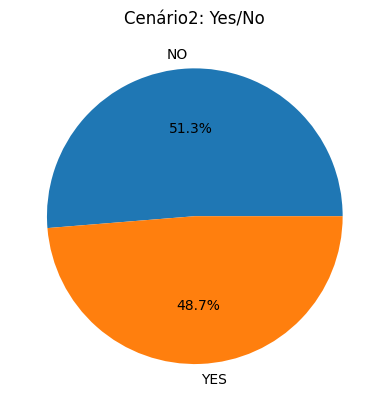

In [30]:
show_pie(my_df=df_issues_commits_classes_criticas_inspected, my_field='architectural_impact', my_title='Cenário2: Yes/No')

### Issues com impacto arquitetural

**95** issues

In [31]:
df_issues_com_impacto_arquitetural = df_issues_commits_classes_criticas_inspected[df_issues_commits_classes_criticas_inspected.architectural_impact=='YES']
df_issues_com_impacto_arquitetural

,issue_key,issue_type,summary,description,status,priority,comments,architectural_impact
7,CASSANDRA-492,New Feature,Data Center Quorum,Need a Cassandra Datacenter Quorum Read and Da...,Resolved,Low,Plz review this patch and let me know in case ...,YES
10,CASSANDRA-771,Improvement,Allow range queries against non-primary nodes ...,Currently any node being down will break range...,Resolved,Low,"02\n iterate ranges rather than endpoints, ...",YES
11,CASSANDRA-764,New Feature,bitmasks applied to SliceRange,Add bitmasks (OR of an array of ANDs) to the S...,Resolved,Low,This patch introduces the bitmasks parameter i...,YES
12,CASSANDRA-733,Improvement,"track latency in nanoseconds, not milliseconds","many ops finish in <1ms so presenting as ms (""...",Resolved,Low,possibly we want to measure w/ nanotime but st...,YES
13,CASSANDRA-709,New Feature,Add jmx progress indicators for streaming & bo...,Currently there is no way to get information a...,Resolved,Low,here's the first patch in the set i was thinki...,YES
...,...,...,...,...,...,...,...,...
182,CASSANDRA-16407,Improvement,Add possibility to copy SSTables in SSTableImp...,SSTableImporter moves data from source to targ...,Resolved,Normal,first review posted on the PR\nIncorporated ch...,YES
186,CASSANDRA-17166,Improvement,Enhance SnakeYAML properties to be reusable ou...,SnakeYaml is rather limited in the “object map...,Resolved,Normal,Here is a quick POC: https://github.com/apache...,YES
187,CASSANDRA-17065,Improvement,Introduce separate rate limiting settings for ...,With the introduction of entire SSTable stream...,Resolved,Normal,PR: https://github.com/apache/cassandra/pull/1...,YES
188,CASSANDRA-16926,Improvement,Mockable FileSystem,To support CEP-10 it is necessary to support a...,Resolved,Normal,Branch: https://github.com/beobal/cassandra/tr...,YES


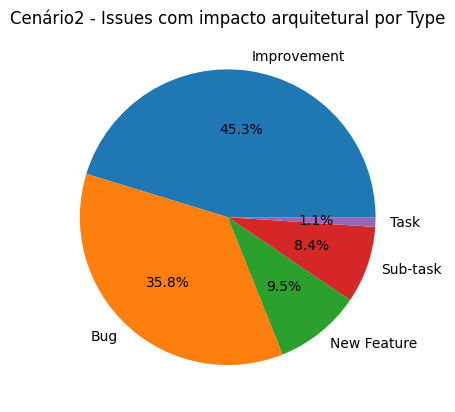

In [32]:
show_pie(my_df=df_issues_com_impacto_arquitetural, my_field='issue_type', my_title='Cenário2 - Issues com impacto arquitetural por Type')

**Commits dos issues com impacto arquitetural**

Observei que os issues com impacto arquitetural possuem commits com muitas LOCs modificadas e muitos arquivos modificados.

In [33]:
l_issue_key_com_impacto_arquitetural = df_issues_com_impacto_arquitetural.issue_key.to_list()
filtered_df_commits_com_issues_com_impacto = df_final[df_final['lista_issues'].isin(l_issue_key_com_impacto_arquitetural)]
filtered_df_commits_com_issues_com_impacto

,hahs,lista_issues,msg,m_files,date,lines,files,diff_files,diff_modified_files
225,d2c2365a78e52424a88baf30448c1148d1ee787e,CASSANDRA-492,"add dcquorum/dcquorumsync consistency levels, ...","['StorageProxy.java', 'StorageService.java']",26/10/2009,761,12,"[\n {\n ""StorageProxy.java"": ""@@ -72...","[\n ""@@ -92,7 +92,9 @@ enum ConsistencyLeve..."
232,ccafdada1384428f42e3da3e9a507759ff170993,CASSANDRA-492,fixes for DQ quorum code. patch by Vijay Part...,['StorageProxy.java'],30/10/2009,44,4,"[\n {\n ""StorageProxy.java"": ""@@ -20...","[\n ""@@ -49,7 +49,6 @@ public class Datacen..."
236,242fa0231bd74fe09454e67c10a4af651dd8c4e2,CASSANDRA-522,CASSANDRA-522\nconvert replication strategy me...,"['ColumnFamilyStore.java', 'CompactionManager....",3/11/2009,114,9,"[\n {\n ""ColumnFamilyStore.java"": ""@...","[\n ""@@ -289,7 +289,7 @@ public final class..."
237,3678daa0be6e88821b3a61e20c78493d6f119449,CASSANDRA-522,brute-force replacement of throwing maps aroun...,['StorageService.java'],3/11/2009,330,9,"[\n {\n ""StorageService.java"": ""@@ -...","[\n ""@@ -146,14 +146,13 @@ public class Boo..."
238,46e5f23e1bb6cf374d0d89ecff40c84a1824b998,CASSANDRA-522,fix NPE caused by getToken on endpoint that is...,['StorageService.java'],3/11/2009,28,3,"[\n {\n ""StorageService.java"": ""@@ -...","[\n ""@@ -110,7 +110,7 @@ public class BootS..."
...,...,...,...,...,...,...,...,...,...
3205,6a1d9de3d938d24baa2ba98b5379b0536177c786,CASSANDRA-16926,[CASSANDRA-16926] CEP-10 Phase 1: Mockable Fil...,"['DatabaseDescriptor.java', 'ColumnFamilyStore...",7/10/2021,6710,458,"[\n {\n ""DatabaseDescriptor.java"": ""...","[\n ""@@ -44,10 +44,10 @@\n </module>\n ..."
3222,77dde2a3c4b40da3d820d4852c572338acbf6dc9,CASSANDRA-17065,Introduce separate rate limiting settings for ...,"['Config.java', 'DatabaseDescriptor.java', 'St...",10/11/2021,862,29,"[\n {\n ""Config.java"": ""@@ -244,6 +2...","[\n ""@@ -1,4 +1,5 @@\n 4.1\n+ * Introduce s..."
3302,3409e5d9b341de2114d6410225922843539d4172,CASSANDRA-17166,Enhance SnakeYAML properties to be reusable ou...,['Config.java'],22/4/2022,3325,33,"[\n {\n ""Config.java"": ""@@ -73,19 +7...","[\n ""@@ -69,6 +69,9 @@\n <..."
3372,b2660bcf78ccf08a3a0ae39a8c9ffb397efef9ff,CASSANDRA-17921,Fix JMX security vulnerabilities\n\n patch by ...,['CassandraDaemon.java'],18/10/2022,205,5,"[\n {\n ""CassandraDaemon.java"": ""@@ ...","[\n ""@@ -1,4 +1,5 @@\n 3.0.28\n+ * Harden J..."


In [34]:
print('Dados estatísticos das linhas modificadas e arquivos modificados ')
round(filtered_df_commits_com_issues_com_impacto.describe(), 1)

Dados estatísticos das linhas modificadas e arquivos modificados 


,lines,files
count,130.0,130.0
mean,919.6,22.0
std,1699.0,48.6
min,2.0,1.0
25%,99.5,4.0
50%,263.0,9.0
75%,988.0,23.8
max,13576.0,458.0


### Issues sem impacto arquitetural

**100** issues

In [35]:
df_issues_sem_impacto_arquitetural = df_issues_commits_classes_criticas_inspected[df_issues_commits_classes_criticas_inspected.architectural_impact=='NO']
df_issues_sem_impacto_arquitetural

,issue_key,issue_type,summary,description,status,priority,comments,architectural_impact
0,CASSANDRA-235,Sub-task,Move system CFs into own Table,NaN,Resolved,Normal,commit message for 04 reads\n\n DBManager o...,NO
1,CASSANDRA-195,Improvement,Improve bootstrap algorithm,When you add a node to an existing cluster and...,Resolved,Normal,How does the new node (node Z) know that there...,NO
2,CASSANDRA-162,Bug,migrate to junit,junit has a fork option which will allow our t...,Resolved,Normal,you'll want to put the junit4 jar in lib/ to r...,NO
3,CASSANDRA-153,Bug,get_key_range timeout and exception,My test code:\n\n\t\tint max = 5000;\t\t\n\t\t...,Resolved,Normal,1 node\n\nDefault config except:\n\n <Memtable...,NO
4,CASSANDRA-130,Improvement,uniform logging of read/write paths,lots of stuff is logged but mostly haphazardly...,Resolved,Normal,move the important timing data into MBeans; re...,NO
...,...,...,...,...,...,...,...,...
189,CASSANDRA-17523,Improvement,Reduce histogram snapshot long[] allocation ov...,Every 5 seconds with the default {{read_reques...,Resolved,Normal,Pushed a patch that addressed the two points i...,NO
190,CASSANDRA-17425,Improvement,Add new CQL function maxWritetime,"The function ""writetime"" does not support mult...",Resolved,Normal,PR: https://github.com/apache/cassandra/pull/1...,NO
191,CASSANDRA-17738,Task,Validate that JMX updates any new 4.1 properti...,Check that any properties which are added in 4...,Resolved,Normal,So far the issues I found are minor as those p...,NO
192,CASSANDRA-17711,Improvement,Create a new node tool supporting force compac...,Need to create new tool called {*}nodetool for...,Resolved,Normal,https://github.com/apache/cassandra/pull/1700\...,NO


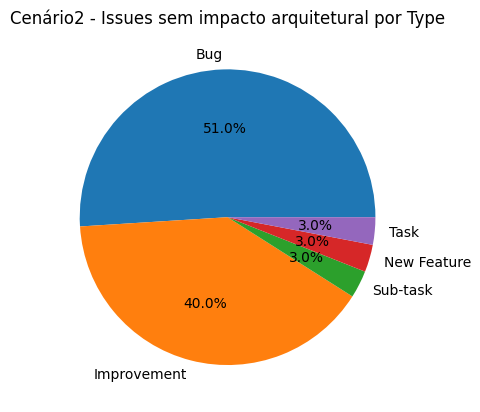

In [36]:
show_pie(my_df=df_issues_sem_impacto_arquitetural, my_field='issue_type', my_title='Cenário2 - Issues sem impacto arquitetural por Type')

**Commits dos issues sem impacto arquitetural**

Observei que os issues sem impacto arquitetural possuem commits com poucas LOCs modificadas e poucos arquivos modificados.

In [37]:
l_issue_key_sem_impacto_arquitetural = df_issues_sem_impacto_arquitetural.issue_key.to_list()
filtered_df_commits_com_issues_sem_impacto = df_final[df_final['lista_issues'].isin(l_issue_key_sem_impacto_arquitetural)]
filtered_df_commits_com_issues_sem_impacto

,hahs,lista_issues,msg,m_files,date,lines,files,diff_files,diff_modified_files
0,91afe8b6e9e9f0a808261b72c8532841b871ba45,CASSANDRA-65,move *Partitioner from cassandra.service to ca...,['StorageService.java'],27/4/2009,31,6,"[\n {\n ""StorageService.java"": ""@@ -...","[\n ""@@ -44,7 +44,7 @@ import org.apache.ca..."
1,63a748ccf9ab5192456baca9dd90b4c0cf2a2038,CASSANDRA-65,r/m unused code\npatch by jbellis; reviewed by...,['StorageService.java'],27/4/2009,72,2,"[\n {\n ""StorageService.java"": ""@@ -...","[\n ""@@ -71,40 +71,7 @@ public class RackUn..."
2,907d92e21b8ce79e6a224933764e3b7215a94454,CASSANDRA-65,replace BigInteger tokens with BigIntegerToken...,"['ColumnFamilyStore.java', 'StorageService.java']",27/4/2009,1090,31,"[\n {\n ""ColumnFamilyStore.java"": ""@...","[\n ""@@ -43,6 +43,7 @@ import org.apache.lo..."
3,ec7f04b4df62b87231d9cacca754a209bd8fcc59,CASSANDRA-65,r/m StorageService.token in favor of explicitl...,"['ColumnFamilyStore.java', 'StorageService.java']",27/4/2009,101,8,"[\n {\n ""ColumnFamilyStore.java"": ""@...","[\n ""@@ -1113,7 +1113,7 @@ public class Col..."
4,296e15b63cdb678a12db004e29359eaf8c14c6c5,CASSANDRA-65,add test for ReplicaPlacementStrategy covering...,['StorageService.java'],27/4/2009,77,3,"[\n {\n ""StorageService.java"": ""@@ -...","[\n ""@@ -2,7 +2,7 @@ package org.apache.cas..."
...,...,...,...,...,...,...,...,...,...
3317,26dd119679605bf61ad3caa24a70509e5be5aac9,CASSANDRA-17425,Add new CQL function maxWritetime\n\npatch by ...,['SelectStatement.java'],18/5/2022,350,18,"[\n {\n ""SelectStatement.java"": ""@@ ...","[\n ""@@ -1,4 +1,5 @@\n 4.2\n+ * Add new CQL..."
3318,c635f198f6ceca272e61b857b67fd91f23da3836,CASSANDRA-17638,Fix leak of non-standard Java types in our Exc...,['DatabaseDescriptor.java'],19/5/2022,302,20,"[\n {\n ""DatabaseDescriptor.java"": ""...","[\n ""@@ -1,4 +1,6 @@\n 4.1\n+ * Fix leak of..."
3333,1c70149ef512212d9cf8f57cb703fce92bf3dafa,CASSANDRA-17738,Fix Settings Virtual Table to update paxos_var...,"['Config.java', 'DatabaseDescriptor.java']",25/7/2022,28,9,"[\n {\n ""Config.java"": ""@@ -777,7 +7...","[\n ""@@ -1,4 +1,6 @@\n 4.1-alpha2\n+ * Fix ..."
3379,873e024a32d37de08550c8106a8d7fd52bda588b,CASSANDRA-17711,CASSANDRA-17711: Add nodetool forcecompact,"['ColumnFamilyStore.java', 'CompactionManager....",7/11/2022,465,11,"[\n {\n ""ColumnFamilyStore.java"": ""@...","[\n ""@@ -1,4 +1,5 @@\n 4.2\n+ * Add nodetoo..."


In [38]:
print('Dados estatísticos das linhas modificadas e arquivos modificados ')
round(filtered_df_commits_com_issues_sem_impacto.describe(), 1)

Dados estatísticos das linhas modificadas e arquivos modificados 


,lines,files
count,122.0,122.0
mean,605.5,16.3
std,1481.4,42.2
min,3.0,1.0
25%,31.0,3.0
50%,117.0,5.0
75%,454.0,13.8
max,9669.0,418.0
